## Plots
----
Maps and Boxplots –– 2024

In [ ]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from matplotlib import ticker
import os
import rasterio as rio

In [ ]:
df = pd.read_csv('./source_data_2022/maxvol_pred_rk.csv')
df_ok = pd.read_csv('./source_data_2022/maxvol_pred_ok.csv')

In [ ]:
fname = './source_data_2022/maxvol_pred_rk.csv'
df = pd.read_csv(fname)
mask = df['k']==20
select = df.loc[mask]
gdf=gpd.GeoDataFrame(data=select, crs="EPSG:32637",geometry=gpd.points_from_xy(x=select.x, y=select.y))
gdf=gdf.to_crs(epsg=4326)
gdf.shape
# gdf.to_file('/Users/mikhailgasanov/Downloads/maxvol.geojson', driver='GeoJSON')

(50625, 15)

In [ ]:
gdf.iloc[:,1:-1].to_csv('maxvol.csv')

In [ ]:
plt.style.use(['science', 'nature', 'no-latex'])

In [ ]:
# sns.set_context('paper')

## 1. Maps

In [ ]:
soil_props = ['Moisture_perc_30','Moisture_perc_80',  
              'pen_resist_30', 'pen_resist_80',
              'temp_30', 'temp_80', 'mean_yeild_c_per_ha']

soil_plots = {'Moisture_perc_30': "Moisture - 30",
              'pen_resist_30':'Penetration resistance - 30', 
              'temp_30' : 'Temperature - 30',
              'Moisture_perc_80': "Moisture - 80",  
             'pen_resist_80':'Penetration resistance - 80',
            'temp_80' : 'Temperature - 80',
             'mean_yeild_c_per_ha': 'Crop yield'}
soil_props = list(soil_plots.keys())

In [ ]:
gdf = gdf.iloc[::50, :]

In [ ]:
gdf[['Moisture_perc_10', 'Moisture_perc_30',
       'Moisture_perc_80', 'pen_resist_10', 'pen_resist_30', 'pen_resist_80',
       'temp_10', 'temp_30', 'temp_80', 'mean_yeild_c_per_ha']].describe().to_excel('./2024_desribe_rk.xlsx')

In [ ]:
fname = './source_data_2022/maxvol_pred_rk.csv'

fname = './source_data_2024/kennard_stone_results/kennard_stone_pred_rk.csv'
df = pd.read_csv(fname)
mask = df['k']==50
select = df.loc[mask]
gdf=gpd.GeoDataFrame(data=select, crs="EPSG:32637",geometry=gpd.points_from_xy(x=select.x, y=select.y))
gdf=gdf.to_crs(epsg=4326)
# gdf.shape
# gdf.to_file('/Users/mikhailgasanov/Downloads/maxvol.geojson', driver='GeoJSON')

gdf['mean_yeild_c_per_ha'].describe()

count    50625.000000
mean       669.315330
std         90.656041
min        123.531871
25%        619.669001
50%        680.080281
75%        734.238712
max        984.135984
Name: mean_yeild_c_per_ha, dtype: float64

In [ ]:
gdf.describe().to_excel('./2024_desribe_rk_kennard_1.xlsx')

In [ ]:
# fname = './source_data_2022/maxvol_pred_ok.csv'

fname = './source_data_2024/kennard_stone_results/kennard_stone_pred_ok.csv'
df = pd.read_csv(fname)
mask = df['k']==20
select = df.loc[mask]
gdf=gpd.GeoDataFrame(data=select, crs="EPSG:32637",geometry=gpd.points_from_xy(x=select.x, y=select.y))
gdf=gdf.to_crs(epsg=4326)
# gdf.shape
# gdf.to_file('/Users/mikhailgasanov/Downloads/maxvol.geojson', driver='GeoJSON')

gdf['mean_yeild_c_per_ha'].describe()

count    50625.000000
mean       623.787855
std          1.360244
min        618.413398
25%        623.146793
50%        623.928624
75%        624.521318
max        627.783892
Name: mean_yeild_c_per_ha, dtype: float64

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_38192/1806438391.py:17: SyntaxWarning: invalid escape sequence '\d'
  "Temperatue, $\degree$C",
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_38192/1806438391.py:20: SyntaxWarning: invalid escape sequence '\d'
  "Temperatue, $\degree$C",


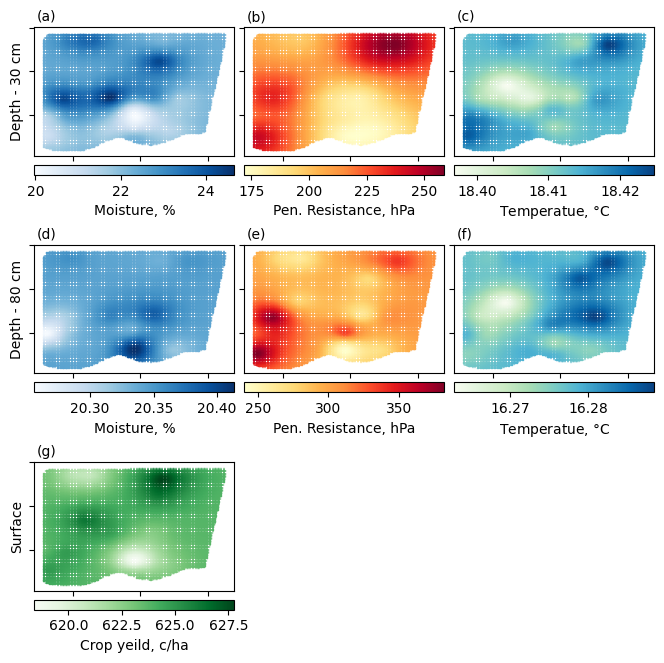

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

folder = "/Users/mikhailgasanov/Yandex.Disk.localized/Articles/My_articles/MaxVol - 2021/"


fig, axes = plt.subplots(3,3,figsize=(8,8), gridspec_kw={'hspace': 0.2, 'wspace': 0.05})
axes = axes.flatten()

cmaps = ["Blues","YlOrRd", "GnBu", "Blues", "YlOrRd", "GnBu", "Greens"]

ylabels = ["Depth - 30 cm","Depth - 30 cm","Depth - 30 cm", 
         "Depth - 80 cm","Depth - 80 cm","Depth - 80 cm", "Surface"]

legend_name = ["Moisture, %",
           "Pen. Resistance, hPa",
           "Temperatue, $\degree$C",
           "Moisture, %", 
           "Pen. Resistance, hPa",
           "Temperatue, $\degree$C",
           "Crop yeild, c/ha"]
for i, soil in enumerate(soil_props):
    gdf.plot(soil,
     cmap=cmaps[i], 
     ax=axes[i],
     marker='s',
     s=0.05,
     legend=True,
     legend_kwds={"orientation": "horizontal",
                  "label":legend_name[i],
                  "pad": 0.05})
    if i in [0,3,6]:
        axes[i].set_ylabel(ylabels[i])
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[i].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.setp(axes[i].get_yticklabels(), visible=False)
    plt.setp(axes[i].get_xticklabels(), visible=False)
#     break
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
for i in range(7):
    plt.text(0.01, 
             1.05,
             f'({string.ascii_lowercase[i]})',
             transform=axes[i].transAxes)
# plt.text(0.01, 1.1, 'Some text', transform=axes[i].transAxes)
fname = os.path.join('./source_data_2022/', "maps_ok_kennard_stone.png")
plt.savefig(fname, dpi=300)
plt.show()

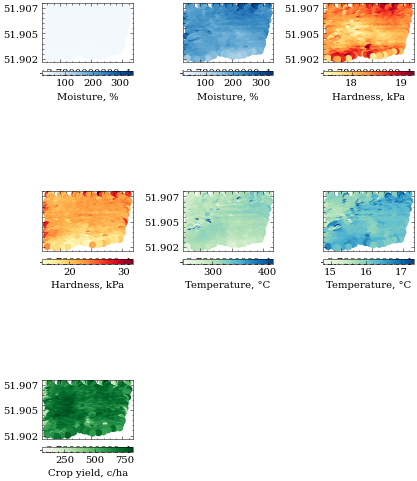

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(6,8))


moisture_max = gdf[soil_props[0:2]].max().max()
moisture_min = gdf[soil_props[0:2]].min().min()

ax1 = fig.add_subplot(331)
gdf.plot(soil_props[0],
         vmin = moisture_min,
         vmax=moisture_max,
         cmap='Blues', 
         ax=ax1,
         legend=True,
         legend_kwds={"orientation": "horizontal",
                      "label":'Moisture, %', "pad": 0.05})
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)


ax2 = fig.add_subplot(332)
gdf.plot(soil_props[1], 
         cmap = 'Blues',
          vmin = moisture_min,
         vmax=moisture_max,
         ax=ax2,
         legend=True, 
         legend_kwds={"orientation": "horizontal", "label":'Moisture, %', "pad": 0.05, })
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)


ax3 = fig.add_subplot(333)
gdf.plot(soil_props[2], cmap='YlOrRd', ax=ax3, legend=True, 
         legend_kwds={"orientation": "horizontal", "label":'Hardness, kPa', "pad": 0.05})
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)


ax4 = fig.add_subplot(334)
gdf.plot(soil_props[3], cmap='YlOrRd', ax=ax4, legend=True, 
         legend_kwds={"orientation": "horizontal",  "label":'Hardness, kPa', "pad": 0.05})
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)


ax5 = fig.add_subplot(335)
gdf.plot(soil_props[4], cmap = 'GnBu', ax=ax5, legend=True, 
         legend_kwds={"orientation": "horizontal", "label":'Temperature, °C', "pad": 0.05})
ax5.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)


ax6 = fig.add_subplot(336)
gdf.plot(soil_props[5], cmap = 'GnBu', ax=ax6, legend=True, 
         legend_kwds={"orientation": "horizontal", "label":'Temperature, °C', "pad": 0.05})
ax6.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)

ax7 = fig.add_subplot(3,3,7)
gdf.plot(soil_props[6], cmap='Greens', ax=ax7, legend=True, 
         legend_kwds={"orientation": "horizontal", "label":'Crop yield, c/ha' ,"pad": 0.05})
ax7.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
df_train = pd.read_csv('./source_data_2022/maxvol_paper_data/maxvol_train_rk.csv', index_col=0)

In [ ]:
mask = df_train['k']==40
select = df_train.loc[mask]

In [ ]:
input_df = pd.read_csv('./source_data_2022/maxvol_paper_data/kshen_data.csv')

In [ ]:
input_df.describe().to_excel('./original_data_stats.xlsx')


In [ ]:
input_df = pd.read_csv('./source_data_2022/maxvol_paper_data/kshen_data.csv')
input_df = input_df.rename(columns={"LAT":'y', "LON": 'x'})

df_train = pd.read_csv('./source_data_2022/maxvol_paper_data/maxvol_train_rk.csv', index_col=0)
# df_train = pd.read_csv('./source_data_2022/maxvol_paper_data/maxvol_pred_rk.csv', index_col=0)

In [ ]:
input_df = pd.read_csv('./source_data_2022/maxvol_paper_data/kshen_data.csv')
input_df = input_df.rename(columns={"LAT":'y', "LON": 'x'})
general = pd.DataFrame()
for k in [10,20,30]:
#     fig, axes = plt.subplots(2,4, figsize=(10,5))
#     axes = axes.flatten()
    for i, ax in enumerate(soil_props):
#         print(k, 'points')
        mask = df_train['k']==k
        maxvol_coords= df_train.loc[mask, ['x', 'y']]
        cont = {}
        cont['cLHS'] = np.random.choice(input_df[soil_props[i]], size=k, replace=False)
        cont['Simple random'] = np.random.choice(input_df[soil_props[i]], size=k, replace=False)
        cont['MaxVol'] = input_df.merge(maxvol_coords)[soil_props[i]].values
        for key in cont:
            df= pd.DataFrame.from_dict(data={'value':cont[key], 
                                                'type':key,
                                               'k':k,
                                               'soil':soil_props[i]})
            general = pd.concat([general, df])


## 2. Boxplots for comparison of sampling methods

In [ ]:
df_train_ks = pd.read_csv('./source_data_2024/kennard_stone_results/kennard_stone_train_rk.csv', index_col=0)
df_train = pd.read_csv('./source_data_2022/maxvol_paper_data/maxvol_train_rk.csv', index_col=0)

In [ ]:
input_df = pd.read_csv('./source_data_2022/maxvol_paper_data/kshen_data.csv')
input_df = input_df.rename(columns={"LAT":'y', "LON": 'x'})
general = pd.DataFrame()
for k in [10,20,30]:
    for i, ax in enumerate(soil_props):
        mask = df_train['k']==k
        maxvol_coords= df_train.loc[mask, ['x', 'y']]
        mask = df_train_ks['k']==k
        ks_coords= df_train_ks.loc[mask, ['x', 'y']]
        cont = {}
        cont['cLHS'] = np.random.choice(input_df[soil_props[i]], size=k, replace=False)
        cont['Simple random'] = np.random.choice(input_df[soil_props[i]], size=k, replace=False)
        cont['MaxVol'] = input_df.merge(maxvol_coords)[soil_props[i]].values
        cont['Kennard-Stone'] = input_df.merge(ks_coords)[soil_props[i]].values
        for key in cont:
            df= pd.DataFrame.from_dict(data={'value':cont[key], 
                                                'type':key,
                                               'k':k,
                                               'soil':soil_props[i]})
            general = pd.concat([general, df])

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_3600/3777875709.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


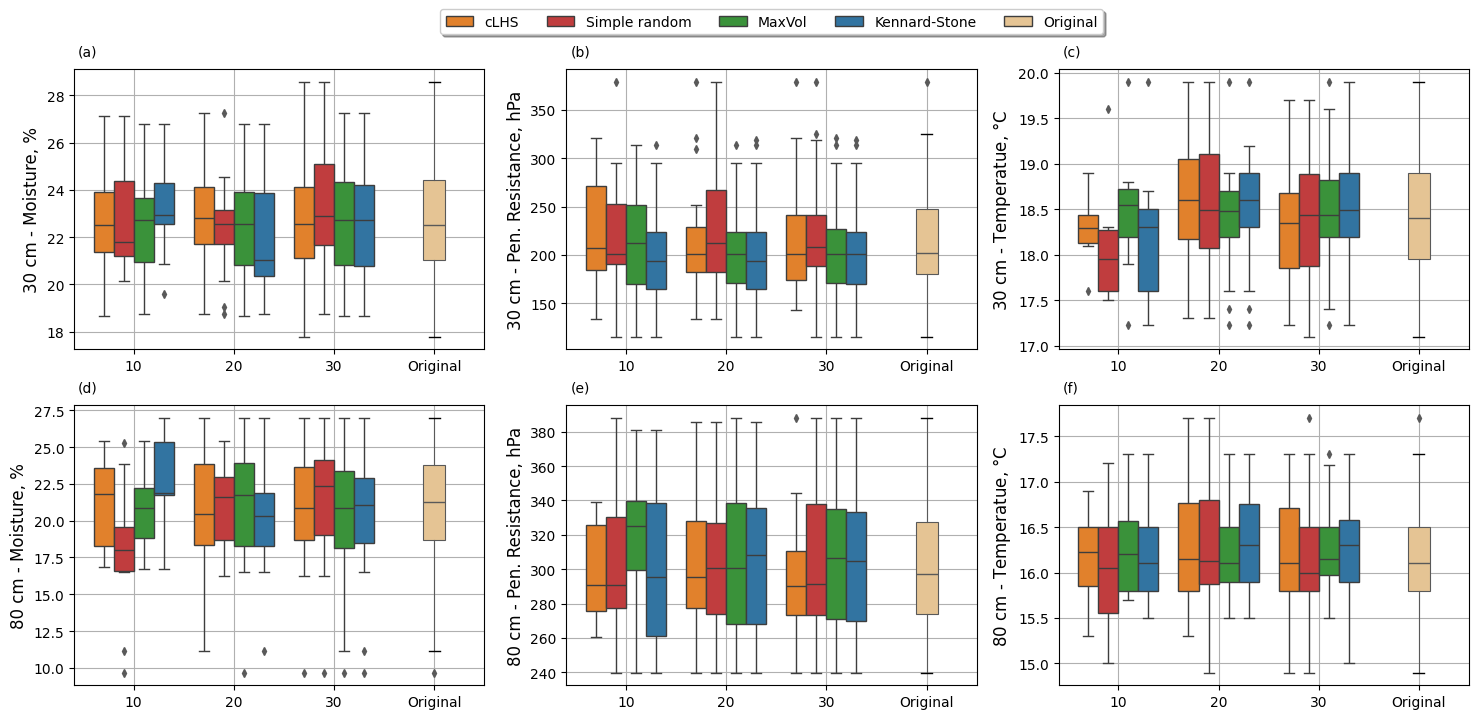

In [ ]:
import matplotlib.patches as mpatches
fig, axes = plt.subplots(2,3,figsize=(18,8), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
axes=axes.flatten()

palette = sns.color_palette('tab10')
my_colors = {'cLHS':palette[1], 
             'Simple random': palette[3],
             'MaxVol': palette[2], 
             'Kennard-Stone':palette[0]}


soil_plots = {'Moisture_perc_30': 'Moisture - 30',
             'pen_resist_30': 'Penetration resistance - 30',
             'temp_30': 'Temperature - 30',
             'Moisture_perc_80': 'Moisture - 80',
             'pen_resist_80': 'Penetration resistance - 80',
             'temp_80': 'Temperature - 80',
             }
ylabels = ["30 cm - Moisture, %",
           "30 cm - Pen. Resistance, hPa",
           r"30 cm - Temperatue, $\degree$C",
           "80 cm - Moisture, %", 
           "80 cm - Pen. Resistance, hPa",
           r"80 cm - Temperatue, $\degree$C",
           "Crop yeild, c/ha"]
edgecolor = (0.34901960784313724, 0.34901960784313724, 0.34901960784313724, 1.0)
for i, soil in enumerate(soil_plots):
    df = general.loc[general['soil']==soil]
    in_df = pd.DataFrame(data={'value':input_df[soil].values,
                           'type':'Original', 'k':31, 'soil':soil}) 
    bp = sns.boxplot(data=df,
                     x="k",
                     y="value", 
                     hue="type",
                     order = [10,20,30,31],
                     # palette=sns.color_palette("Set2")[:4],
                     palette=my_colors,
                     # saturation=1,
                     ax=axes[i],
                    flierprops=dict(color=edgecolor, 
                      markerfacecolor=edgecolor,
                      markersize=4, 
                      markeredgecolor=edgecolor,
                     marker='d')
                    )
    bp3 = axes[i].boxplot(in_df['value'],
                          boxprops=dict(facecolor=sns.color_palette("Set2")[6],
                                       edgecolor=edgecolor, linewidth=0.8,),
                          whiskerprops = dict(linestyle='-',linewidth=0.8, color=edgecolor),
                          flierprops=dict(color=edgecolor, 
                                          markerfacecolor=edgecolor,
                                          markersize=4, 
                                          markeredgecolor=edgecolor,
                                         marker='d'),
                          medianprops=dict(color=edgecolor),
                          widths=[0.22],
                          positions=[3],
                          showfliers=True,
                          patch_artist=True)
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel(ylabels[i], fontsize=12)
    axes[i].grid()
    axes[i].set_xticks([0,1,2,3])
    axes[i].set_xticklabels([10,20,30, 'Original'], fontsize=10)    
    
    if i==2:
    

        handles, labels = axes[2].get_legend_handles_labels()
        handle = handles[0]
        handle.get_edgecolor()
        # manually define a new patch 
        patch = mpatches.Patch(facecolor=sns.color_palette("Set2")[6], edgecolor=handle.get_edgecolor(), label='Original')
        
        # handles is a list, so append manual patch
        handles.append(patch) 
        axes[2].legend(handles=handles,
                       loc='upper center', 
                       bbox_to_anchor=(-0.7, 1.24),
                       ncol=5, 
                       fancybox=True, 
                       frameon=True, 
                       shadow=True)
    else:
        axes[i].legend('').remove()
for i in range(6):
    plt.text(0.01, 
             1.05,
             f'({string.ascii_lowercase[i]})', fontsize=10,
             transform=axes[i].transAxes)

plt.tight_layout()
# plt.savefig('./source_data_2022/boxplot_grid_2024.svg')
# plt.savefig('./source_data_2022/boxplot_grid_2024.png', dpi=300)
# plt.savefig('./source_data_2022/boxplot_grid_2024.pdf')

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_3600/2473609899.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


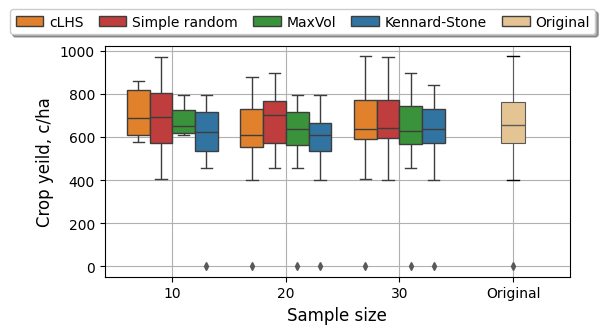

In [ ]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1,1,figsize=(6,3), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

soil_plots = {'mean_yeild_c_per_ha': 'Crop yield'}
ylabels = ["Crop yeild, c/ha"]
edgecolor = (0.34901960784313724, 0.34901960784313724, 0.34901960784313724, 1.0)
soil = 'mean_yeild_c_per_ha'

df = general.loc[general['soil']==soil]
in_df = pd.DataFrame(data={'value':input_df[soil].values,
                       'type':'Original', 'k':31, 'soil':soil}) 
bp = sns.boxplot(data=df,
                 x="k",
                 y="value", 
                 hue="type",
                 order = [10,20,30,31],
                 palette=my_colors,
                 ax=ax,
                flierprops=dict(color=edgecolor, 
                  markerfacecolor=edgecolor,
                  markersize=4, 
                  markeredgecolor=edgecolor,
                 marker='d')
                )
bp3 = ax.boxplot(in_df['value'],
                      boxprops=dict(facecolor=sns.color_palette("Set2")[6],
                                   edgecolor=edgecolor, linewidth=0.8,),
                      whiskerprops = dict(linestyle='-',linewidth=0.8, color=edgecolor),
                      flierprops=dict(color=edgecolor, 
                                      markerfacecolor=edgecolor,
                                      markersize=4, 
                                      markeredgecolor=edgecolor,
                                     marker='d'),
                      medianprops=dict(color=edgecolor),
                      widths=[0.22],
                      positions=[3],
                      showfliers=True,
                      patch_artist=True)

ax.set_xlabel('Sample size', fontsize=12)
ax.set_ylabel("Crop yeild, c/ha", fontsize=12)
ax.grid()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([10,20,30, 'Original'], fontsize=10)    

handles, labels = ax.get_legend_handles_labels()
handle = handles[0]
handle.get_edgecolor()
# manually define a new patch 
patch = mpatches.Patch(facecolor=sns.color_palette("Set2")[6], edgecolor=handle.get_edgecolor(), label='Original')

# handles is a list, so append manual patch
handles.append(patch) 
ax.legend(handles=handles,
          fontsize=10,
               loc='lower right', 
               bbox_to_anchor=(1.07, 1.02),
               ncol=5, 
               fancybox=True, 
               frameon=True, 
          handletextpad=0.4,
          columnspacing=1.1,
               shadow=True)
plt.tight_layout()

plt.savefig('./source_data_2022/boxplot_yield.svg', bbox_inches = 'tight')
plt.savefig('./source_data_2022/boxplot_yield.png', dpi=300, bbox_inches = 'tight')
plt.savefig('./source_data_2022/boxplot_yield.pdf', bbox_inches = 'tight')

## End